# Worksheet 18

Name:  Renming Zhang\
UID: U97677301


### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

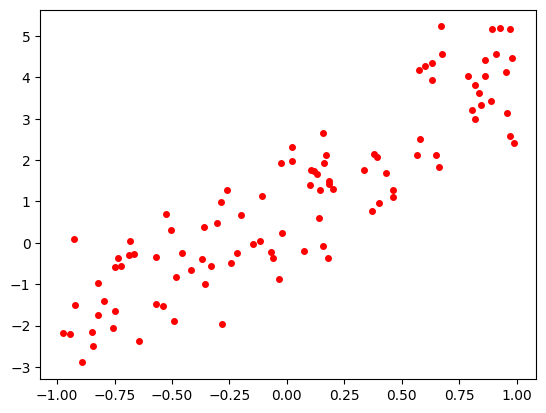

In [11]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

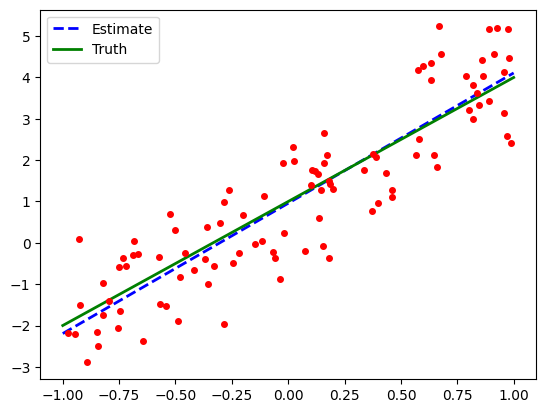

In [12]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The etimate of 'beta' is close to the parameters we used to generate the data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

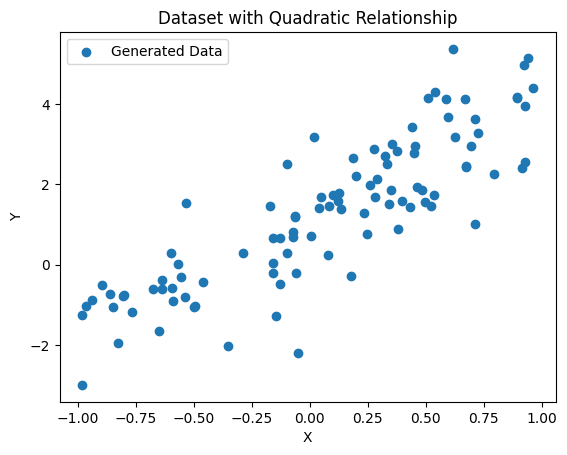

In [13]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

# True coefficients for the quadratic relationship Y = 1 + 3 * X + 0.5 * X^2 + eps
true_coeffs = np.array([1, 3, 0.5])

# Generate random values for X
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

# Generate Y with added noise
eps = np.random.randn(SAMPLE_SIZE)
y = true_coeffs[0] + true_coeffs[1] * x + true_coeffs[2] * x**2 + eps

# Plot the dataset
plt.scatter(x, y, label='Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Quadratic Relationship')
plt.legend()
plt.show()


e) Plot the least squares estimate line through the scatter plot.

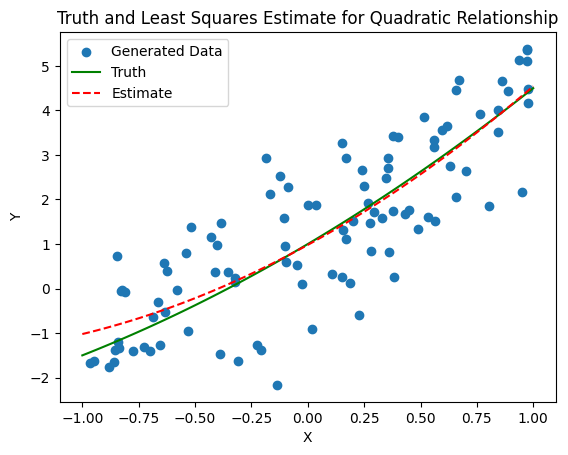

In [14]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

# True coefficients for the quadratic relationship Y = 1 + 3 * X + 0.5 * X^2 + eps
true_coeffs = np.array([1, 3, 0.5])

# Generate random values for X
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

# Generate Y with added noise
eps = np.random.randn(SAMPLE_SIZE)
y = true_coeffs[0] + true_coeffs[1] * x + true_coeffs[2] * x**2 + eps

# Least squares estimation
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Generate values for X to plot the lines
x_plot = np.linspace(-1, 1, 100)
X_plot = np.array([np.ones_like(x_plot), x_plot, x_plot**2]).T

# Calculate Y values using the true coefficients
y_true = X_plot @ true_coeffs

# Calculate Y values using the estimated coefficients
y_est = X_plot @ beta_hat

# Plot the dataset, the true line, and the least squares estimate line
plt.scatter(x, y, label='Generated Data')
plt.plot(x_plot, y_true, 'g-', label='Truth')
plt.plot(x_plot, y_est, 'r--', label='Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Truth and Least Squares Estimate for Quadratic Relationship')
plt.legend()
plt.show()


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate of beta is still close to the parameters we used to generate the data

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

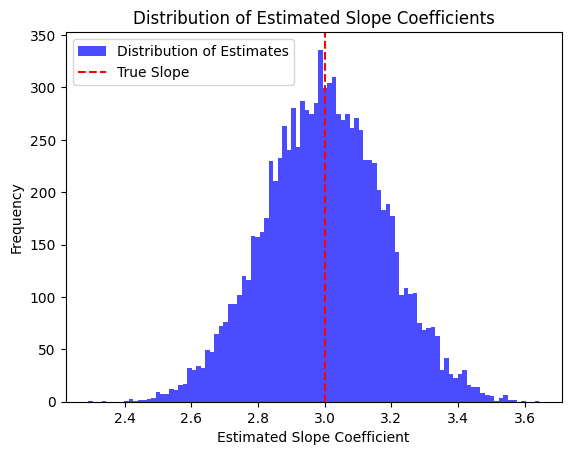

In [15]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_coeffs = np.array([1, 3, 0.5])

def generate_and_estimate(true_coeffs):
    x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    eps = np.random.randn(SAMPLE_SIZE)
    y = true_coeffs[0] + true_coeffs[1] * x + true_coeffs[2] * x**2 + eps

    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta_hat[1]  

betas = []
for _ in range(10000):
    beta_estimate = generate_and_estimate(true_coeffs)
    betas.append(beta_estimate)

plt.hist(betas, bins=100, alpha=0.7, color='blue', label='Distribution of Estimates')
plt.axvline(x=true_coeffs[1], c='r', linestyle='dashed', label='True Slope')
plt.xlabel('Estimated Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Slope Coefficients')
plt.legend()
plt.show()
